In [1]:
import sys,os
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rc('text',usetex=True)
from matplotlib.legend_handler import HandlerLine2D
import pylab as py
import scipy.special as sc
from scipy import interpolate
from scipy.integrate import quad
from mpmath import fp

<ipython-input-1-0b478c36dda5>:5: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [2]:
pwd

'/u/home/nsato'

In [4]:
path='/w/jam-sciwork18/nsato/codes/jam3d'
sys.path.insert(0,path)
os.environ["JAM3D"] = "/w/jam-sciwork18/nsato/codes/jam3d"

In [5]:
#--from tools
from tools.tools     import checkdir,save,load,lprint
import tools.config
from tools.config    import load_config, conf
from tools.inputmod  import INPUTMOD
from tools.randomstr import id_generator

#--from fitlib
from fitlib.resman import RESMAN

In [6]:
#ls /work/JAM/pitonyak/analysis-19-universal/resultsUNIVERSAL/stepFINAL_global_noHtilde_c/

In [7]:
#less /work/JAM/pitonyak/analysis-19-universal/resultsUNIVERSAL/stepFINAL_global_noHtilde_c/input.py

In [8]:
path='/work/JAM/pitonyak/analysis-19-universal/resultsUNIVERSAL/stepFINAL_global_noHtilde_c/'
load_config('%s/input.py'%path)

In [9]:
conf['bootstrap']=False
del conf['datasets']['AN']
del conf['datasets']['dy']
del conf['datasets']['wz']
del conf['datasets']['sia']
conf['datasets'].keys()

dict_keys(['sidis'])

In [10]:
#less /w/jam-sciwork18/pitonyak/analysis-19-universal/resultsUNIVERSAL/EIC_Collins_ALL_DATA_pro_neu_updated/input.py

In [11]:
#less /w/jam-sciwork18/pitonyak/analysis-19-universal/resultsUNIVERSAL/EIC_Collins_SoLID_enhanced_pro_neu/input.py

In [12]:
conf["datasets"]["sidis"]["xlsx"][3120]="sidis/expdata/3120.xlsx"  #   EIC 18x275 (PID & smearing sys)  proton  pi+  x,z,pT
conf["datasets"]["sidis"]["xlsx"][3130]="sidis/expdata/3130.xlsx"  #   EIC 18x275 (PID & smearing sys)  proton  pi-  x,z,pT 
conf["datasets"]["sidis"]["xlsx"][3140]="sidis/expdata/3140.xlsx"  #   EIC 10x100 (PID & smearing sys)  proton  pi+  x,z,pT
conf["datasets"]["sidis"]["xlsx"][3150]="sidis/expdata/3150.xlsx"  #   EIC 10x100 (PID & smearing sys)  proton  pi-  x,z,pT 
conf["datasets"]["sidis"]["xlsx"][3160]="sidis/expdata/3160.xlsx"  #   EIC 5x100 (PID & smearing sys)  proton  pi+  x,z,pT
conf["datasets"]["sidis"]["xlsx"][3170]="sidis/expdata/3170.xlsx"  #   EIC 5x100 (PID & smearing sys)  proton  pi-  x,z,pT 
conf["datasets"]["sidis"]["xlsx"][3180]="sidis/expdata/3180.xlsx"  #   EIC 5x41 (PID & smearing sys)  proton  pi+  x,z,pT
conf["datasets"]["sidis"]["xlsx"][3190]="sidis/expdata/3190.xlsx"  #   EIC 5x41 (PID & smearing sys)  proton  pi-  x,z,pT 
conf["datasets"]["sidis"]["xlsx"][3220]="sidis/expdata/3220.xlsx"  #   EIC 18x100 (PID & smearing sys)  neutron  pi+  x,z,pT
conf["datasets"]["sidis"]["xlsx"][3230]="sidis/expdata/3230.xlsx"  #   EIC 18x100 (PID & smearing sys)  neutron  pi-  x,z,pT 
conf["datasets"]["sidis"]["xlsx"][3240]="sidis/expdata/3240.xlsx"  #   EIC 10x100 (PID & smearing sys)  neutron  pi+  x,z,pT
conf["datasets"]["sidis"]["xlsx"][3250]="sidis/expdata/3250.xlsx"  #   EIC 10x100 (PID & smearing sys)  neutron  pi-  x,z,pT 
conf["datasets"]["sidis"]["xlsx"][3260]="sidis/expdata/3260.xlsx"  #   EIC 5x41 (PID & smearing sys)  neutron  pi+  x,z,pT
conf["datasets"]["sidis"]["xlsx"][3270]="sidis/expdata/3270.xlsx"  #   EIC 5x41 (PID & smearing sys)  neutron  pi-  x,z,pT 

In [13]:
conf["datasets"]["sidis"]["xlsx"][3300]="sidis/expdata/3300.xlsx"  #   SoLID base      proton  pi+  x,z,pT
conf["datasets"]["sidis"]["xlsx"][3310]="sidis/expdata/3310.xlsx"  #   SoLID base      proton  pi-  x,z,pT
conf["datasets"]["sidis"]["xlsx"][3320]="sidis/expdata/3320.xlsx"  #   SoLID enhanced  proton  pi+  x,z,pT
conf["datasets"]["sidis"]["xlsx"][3330]="sidis/expdata/3330.xlsx"  #   SoLID enhanced  proton  pi-  x,z,pT
conf["datasets"]["sidis"]["xlsx"][3400]="sidis/expdata/3400.xlsx"  #   SoLID base      neutron  pi+  x,z,pT
conf["datasets"]["sidis"]["xlsx"][3410]="sidis/expdata/3410.xlsx"  #   SoLID base      neutron  pi-  x,z,pT
conf["datasets"]["sidis"]["xlsx"][3420]="sidis/expdata/3420.xlsx"  #   SoLID enhanced  neutron  pi+  x,z,pT
conf["datasets"]["sidis"]["xlsx"][3430]="sidis/expdata/3430.xlsx"  #   SoLID enhanced  neutron  pi-  x,z,pT

In [14]:
#conf['datasets']

In [15]:
resman=RESMAN(parallel=False)

loading sidis data sets 3430

In [16]:
tab=pd.DataFrame(conf['sidis tabs'][3120])
tab.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'index', 'Q2', 'x', 'z', 'pT', 'obs',
       'sim_value', 'sim_stat', 'sim_sys', 'target', 'hadron', 'col', 'value',
       'stat_u', 'sys_u', 'W2', 'yh', 'yp', 'dy', 'thy', 'N', 'residuals',
       'r-residuals', 'Shift', 'alpha'],
      dtype='object')

In [17]:
tab=pd.DataFrame(conf['sidis tabs'][3320])
tab.columns

Index(['Unnamed: 0', 'index', 'Q2', 'x', 'y', 'z', 'pT', 'obs', 'target',
       'hadron', 'value', 'sim_stat_abs', 'sim_sys', 'sim_sys_abs', 'col',
       'stat_u', 'sys_u', 'W2', 'yh', 'yp', 'dy', 'thy', 'N', 'residuals',
       'r-residuals', 'Shift', 'alpha'],
      dtype='object')

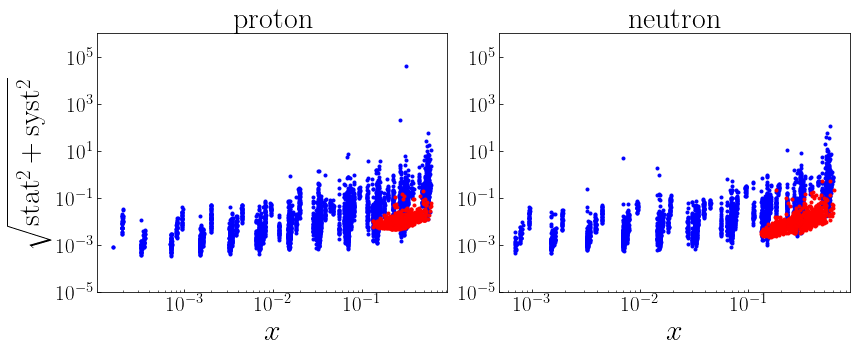

In [25]:
nrows,ncols=1,2
fig = py.figure(figsize=(ncols*6,nrows*5))



ax=py.subplot(nrows,ncols,1);ax1=ax
for idx in [3120,3130,3140,3150,3160,3170,3180,3190]:
    tab=pd.DataFrame(conf['sidis tabs'][idx])
    ax.plot(tab['x'],np.sqrt(tab['sys_u']**2+tab['sim_stat']**2),'b.')
for idx in [3320,3330]:
    tab=pd.DataFrame(conf['sidis tabs'][idx])   
    ax.plot(tab['x'],np.sqrt(tab['sys_u']**2+tab['sim_stat_abs']**2),'r.')    

ax=py.subplot(nrows,ncols,2);ax2=ax
for idx in [3220,3230,3240,3250,3260,3270]:
    tab=pd.DataFrame(conf['sidis tabs'][idx])
    ax.plot(tab['x'],np.sqrt(tab['sys_u']**2+tab['sim_stat']**2),'b.')
for idx in [3420,3430]:
    tab=pd.DataFrame(conf['sidis tabs'][idx])   
    ax.plot(tab['x'],np.sqrt(tab['sys_u']**2+tab['sim_stat_abs']**2),'r.')    



for ax in [ax1,ax2]:
    ax.semilogy()
    ax.tick_params(axis='both', which='both', labelsize=21,direction='in')
    ax.set_xlabel(r'$x$',size=30)
    ax.semilogx()
    ax.set_ylim(1e-5,1e6)

# ax1.set_ylabel(r'$sys$',size=30)
# ax3.set_ylabel(r'$stat$',size=30)
ax1.set_ylabel(r'$\sqrt{\rm stat^2+syst^2}$',size=30)
ax1.set_title(r'$\rm proton$',size=30)
ax2.set_title(r'$\rm neutron$',size=30)


# ax1.set_title('original',size=30)
# ax2.set_title('rescaled',size=30)

py.tight_layout()